In [1]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Part 1: Prepare the Data

In [2]:
# Read myopia.csv into a Pandas DataFrame
file = "myopia.csv"
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset
labels = df['MYOPIC'].values
X = df.drop('MYOPIC', axis=1)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
normalized = normalize(X)

In [5]:
mergings = linkage(normalized, method="ward")

# Part 2: Apply Dimensionality Reduction

In [6]:
# Standarize data with StandardScaler
scaled = StandardScaler().fit_transform(X)
print(scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [7]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
X_pca = pca.fit_transform(scaled)

In [8]:
X_pca.shape

(618, 10)

In [9]:
# Transform PCA data to a DataFrame
df_X_pca = pd.DataFrame(
    data=X_pca, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"]
)
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [10]:
# Check to see if variance is 0.90
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [11]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [12]:
# Run t-SNE on the principal components
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [13]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_X_pca)

C:\Users\smei4\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [14]:
# Check that dimensions have been reduced to two
tsne_features.shape

(618, 2)

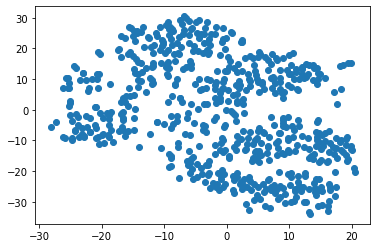

In [15]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

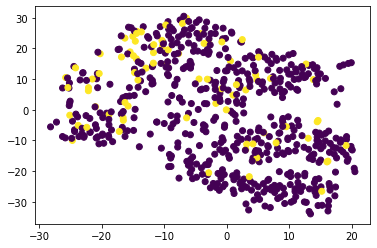

In [16]:
# Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

The number of features got reduced and there are distinct clusters.

# Part 3: Perform a Cluster Analysis with K-means

In [17]:
# Initializing model with K = 3
model = KMeans(n_clusters=3, random_state=5)

In [18]:
# Fitting model
model.fit(df_X_pca)

KMeans(n_clusters=3, random_state=5)

In [19]:
# Get predictions
predictions = model.predict(df_X_pca)
print(predictions)

[1 2 1 1 2 1 1 1 2 1 0 2 1 2 2 2 2 2 0 1 1 1 1 0 2 1 2 2 2 2 1 0 2 1 2 2 0
 2 1 2 1 2 0 2 1 2 0 2 2 2 1 1 1 1 2 1 2 2 1 1 2 2 2 2 0 2 1 2 2 1 0 2 0 0
 2 2 2 0 1 1 1 1 1 2 1 2 0 0 2 2 2 1 2 2 1 0 1 2 2 2 0 1 0 1 0 0 1 1 1 1 0
 1 2 2 1 1 2 1 2 1 1 1 2 2 0 0 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 2 1 2 1 2 1 2
 2 0 1 1 0 2 1 1 1 2 2 2 1 1 2 2 2 2 0 1 2 1 2 1 0 1 1 2 2 1 1 2 2 0 1 2 2
 0 1 1 2 2 2 2 2 2 1 0 1 2 1 1 1 1 2 1 2 1 1 2 1 2 0 2 2 1 1 2 0 1 2 1 2 1
 0 1 1 0 0 2 1 2 0 2 1 0 2 2 1 1 2 2 0 1 1 1 1 1 2 1 0 1 2 0 1 0 2 1 1 1 2
 1 2 1 1 2 1 2 1 2 1 1 2 2 2 0 2 1 1 1 0 1 2 0 2 0 2 2 2 0 1 2 1 1 2 1 0 1
 1 1 0 1 1 2 1 0 2 2 0 1 1 0 1 1 1 2 1 1 1 2 1 0 2 1 2 0 1 1 1 1 2 2 1 2 1
 1 1 1 2 2 1 1 1 2 1 1 2 1 1 2 0 2 1 1 1 1 2 2 1 2 1 2 1 2 1 1 1 1 1 2 2 1
 2 2 2 1 0 2 2 1 1 2 0 1 2 2 2 0 1 0 2 0 1 0 2 1 2 1 2 1 2 2 2 1 2 0 0 1 2
 0 2 2 2 2 1 2 1 1 1 2 2 1 0 0 1 1 0 2 2 0 1 2 0 2 1 1 1 1 1 0 1 0 1 1 1 0
 2 1 2 1 1 2 0 0 2 0 1 2 2 1 2 2 1 2 1 1 0 2 1 0 1 0 1 0 2 1 0 2 1 2 1 2 1
 1 2 0 2 2 1 0 2 0 0 1 1 

C:\Users\smei4\Anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


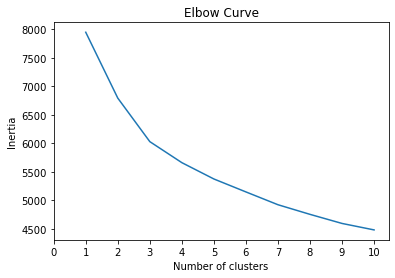

In [20]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_X_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow of the plot is at k=3

In [21]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_X_pca)

# Predict clusters
predictions = model.predict(df_X_pca)

# Add the predicted class column to the dataframe
df_X_pca["class"] = model.labels_
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


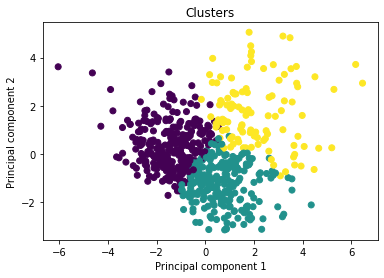

In [22]:
# Visualize the clusters
plt.scatter(x=df_X_pca['pc1'], y=df_X_pca['pc2'], c=df_X_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Clusters')
plt.show()

# Part 4: Make a Recommendation

Based on my findings, patients can be clustered into 3 clusters since the elbow of the elbow plot is at k=3.